In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("C://workspaces//project_data//d_final.csv")
df.head()

,id,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,DEATH,d_ent,d_sym,d_last,diff_days,age_grp
0,167386,1,2,2,54,2,2,2,2,2,...,2,3,1,2,0,2020-04-06,2020-04-01,2020-06-29,89,3.0
1,0b5948,2,2,1,30,2,2,2,2,2,...,2,3,1,2,0,2020-04-17,2020-04-10,2020-06-29,80,2.0
2,0d01b5,1,2,2,60,2,1,2,2,2,...,2,3,1,2,1,2020-04-13,2020-04-13,2020-04-22,9,4.0
3,1beec8,2,2,1,47,2,1,2,2,2,...,2,3,1,1,1,2020-04-16,2020-04-16,2020-04-29,13,3.0
4,1.75E+56,2,2,2,63,2,2,2,2,2,...,2,3,1,2,0,2020-04-22,2020-04-13,2020-06-29,77,4.0


In [6]:
df.describe()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,obesity,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu,DEATH,diff_days,age_grp
count,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,...,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000
mean,1.599374,1.919198,1.394950,52.957577,1.992561,1.714560,1.959776,1.979027,1.966770,1.674105,...,1.799275,1.953655,1.945583,1.917081,2.367676,1.557519,1.917987,0.266914,32.845092,3.187380
std,0.490027,0.276166,0.488859,19.237785,0.100507,0.463632,0.219534,0.173651,0.208078,0.479277,...,0.413378,0.234145,0.247939,0.294203,0.718388,0.694507,0.278025,0.442349,27.360004,0.970514
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,42.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,11.000000,3.000000
50%,2.000000,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,0.000000,24.000000,3.000000
75%,2.000000,2.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,49.000000,4.000000
max,2.000000,3.000000,3.000000,118.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,180.000000,5.000000


In [10]:
t_train_raw = df[['sex', 'intubed','age_grp','pneumonia','pregnancy', 'diabetes', 'copd', 'asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']]
target_raw = df['DEATH']

In [11]:
## 정규화 적용
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(t_train_raw)
x_train_raw = pd.DataFrame(x_scaled)


## train/test 셋 분리
x_train, x_test, target_train, target_test = train_test_split(x_train_raw, target_raw, test_size=0.2)

## 텐서후로우 로지스틱 리그레션

In [34]:
dataset = tf.data.Dataset.from_tensor_slices((x_train.values, target_train.values))

for feat, targ in dataset.take(5):
    print('Festures: {}, Target: {}'.format(feat, targ))

Festures: [1.  0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 1.  0.  0.5], Target: 1
Festures: [1.   0.5  0.75 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  1.   0.5  0.5 ], Target: 0
Festures: [1.   0.5  0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.   0.5  0.5  0.5  0.
 0.5  1.   0.   0.5 ], Target: 0
Festures: [0.   0.5  0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5 ], Target: 0
Festures: [1.  0.5 0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5], Target: 0


In [178]:
train_dataset = dataset.shuffle(len(df)).batch(100)


## 4개 히든층, 각각 10개, 8개, 4개, 1개 출력부, relu와 sigmoid 함수적용 

def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(8, activation='sigmoid'),
        tf.keras.layers.Dense(4, activation='sigmoid'),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    return model

In [179]:
## 학습과 동시에 검증을 하도록 구성하였읍니다

model = get_compiled_model()
hist = model.fit(train_dataset, epochs=15,
         validation_data=(x_test, target_test),
         validation_steps=100,
         verbose=2)

Train for 972 steps, validate on 24279 samples
Epoch 1/15
972/972 - 2s - loss: 0.5610 - accuracy: 0.7323 - val_loss: 0.5053 - val_accuracy: 0.7364
Epoch 2/15
972/972 - 1s - loss: 0.4964 - accuracy: 0.7360 - val_loss: 0.4870 - val_accuracy: 0.7512
Epoch 3/15
972/972 - 1s - loss: 0.4882 - accuracy: 0.7499 - val_loss: 0.4834 - val_accuracy: 0.7541
Epoch 4/15
972/972 - 1s - loss: 0.4857 - accuracy: 0.7526 - val_loss: 0.4821 - val_accuracy: 0.7590
Epoch 5/15
972/972 - 1s - loss: 0.4844 - accuracy: 0.7547 - val_loss: 0.4806 - val_accuracy: 0.7577
Epoch 6/15
972/972 - 1s - loss: 0.4830 - accuracy: 0.7558 - val_loss: 0.4802 - val_accuracy: 0.7583
Epoch 7/15
972/972 - 1s - loss: 0.4821 - accuracy: 0.7569 - val_loss: 0.4783 - val_accuracy: 0.7607
Epoch 8/15
972/972 - 1s - loss: 0.4811 - accuracy: 0.7573 - val_loss: 0.4775 - val_accuracy: 0.7617
Epoch 9/15
972/972 - 1s - loss: 0.4806 - accuracy: 0.7581 - val_loss: 0.4770 - val_accuracy: 0.7608
Epoch 10/15
972/972 - 1s - loss: 0.4797 - accuracy: 0

In [180]:
## 위에서 검증데이터를 평가해보았지만 또 한번 해본결과

score = model.evaluate(x_test, target_test, verbose=2)

24279/24279 - 0s - loss: 0.4748 - accuracy: 0.7609


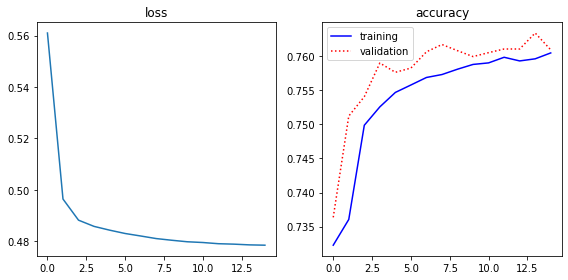

In [181]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

## 로지스틱 모델: sklearn 사용

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 모델 생성 및 예측

In [127]:
model2 = LogisticRegression()
model2.fit(x_train, target_train)
print(model2.score(x_train, target_train))

0.7691523538860744


## 변수의 계수 확인

In [128]:
print(model2.coef_)

[[ 0.2563199  -3.215666    2.29866199 -1.43500113  0.98838344 -0.33244103
   0.21315901  0.65430386 -0.1823756  -0.17769652 -0.2786021   0.09910481
  -0.22647793 -0.5284825   0.1454752   1.42448316 -1.55998436 -0.08798585]]


## 테스트 데이터 예측하기

In [129]:
target_pred = model2.predict(x_test)

## 예측된 테스트 데이터 검증

약 77% 예측률

            생존 예측     사망 예측
실제 생존 (0)

실제 사망 (1)

In [130]:
accuracy_score(target_test, target_pred)

0.7712426376704148

In [131]:
confusion_matrix(target_test, target_pred)

array([[16668,  1210],
       [ 4344,  2057]], dtype=int64)